# 케라스 CNN Fashion MNIST

#### module import

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

### 데이터 로드 및 전처리

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[...,np.newaxis]
x_test = x_test[...,np.newaxis]

x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 모델 구성 및 컴파일
- 임의의 모델

In [ ]:
def build_model():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=(3, 3))(input)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dense(units=10, activation='softmax')(output)
  
  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

  return model

model_1 = build_model()
model_1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### 모델 학습
- 런타임 GPU로 설정

In [ ]:
hist_1 = model_1.fit(x_train, y_train, epochs=25, validation_split=0.3, batch_size=128)

Epoch 1/25
329/329 [==============================] - 3s 9ms/step - loss: 0.5415 - acc: 0.8085 - val_loss: 0.4121 - val_acc: 0.8506
Epoch 2/25
329/329 [==============================] - 3s 9ms/step - loss: 0.3578 - acc: 0.8701 - val_loss: 0.3801 - val_acc: 0.8627
Epoch 3/25
329/329 [==============================] - 3s 9ms/step - loss: 0.3047 - acc: 0.8879 - val_loss: 0.3577 - val_acc: 0.8713
Epoch 4/25
329/329 [==============================] - 3s 9ms/step - loss: 0.2607 - acc: 0.9029 - val_loss: 0.3938 - val_acc: 0.8627
Epoch 5/25
329/329 [==============================] - 3s 9ms/step - loss: 0.2238 - acc: 0.9170 - val_loss: 0.4378 - val_acc: 0.8615
Epoch 6/25
329/329 [==============================] - 3s 9ms/step - loss: 0.1976 - acc: 0.9270 - val_loss: 0.4343 - val_acc: 0.8651
Epoch 7/25
329/329 [==============================] - 3s 9ms/step - loss: 0.1678 - acc: 0.9382 - val_loss: 0.4324 - val_acc: 0.8649
Epoch 8/25
329/329 [==============================] - 3s 9ms/step - loss: 0.

### 학습 결과 시각화

In [ ]:
hist_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

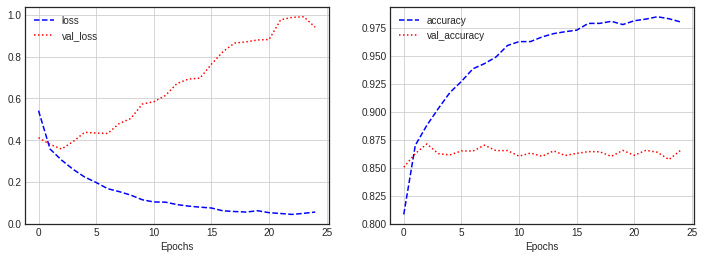

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2 ,1)
plt.plot(hist_1.history['loss'], 'b--', label='loss')
plt.plot(hist_1.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['acc'], 'b--', label='accuracy')
plt.plot(hist_1.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [ ]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9977 - acc: 0.8568


[0.9976553916931152, 0.8568000197410583]

### 모델 재구성
- 학습 파라미터의 수 비교

In [ ]:
def build_model2():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=(3, 3))(input)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Conv2D(filters=64, kernel_size=(3,3))(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=10, activation='softmax')(output)
  
  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

  return model

model_2 = build_model2()
model_2.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)         

### 모델 재학습

In [ ]:
hist_2 = model_2.fit(x_train, y_train, epochs=25, validation_split=0.3, batch_size=128)

Epoch 1/25
329/329 [==============================] - 2s 5ms/step - loss: 0.8919 - acc: 0.6787 - val_loss: 0.5625 - val_acc: 0.7959
Epoch 2/25
329/329 [==============================] - 1s 5ms/step - loss: 0.5746 - acc: 0.7967 - val_loss: 0.4710 - val_acc: 0.8261
Epoch 3/25
329/329 [==============================] - 2s 5ms/step - loss: 0.5007 - acc: 0.8222 - val_loss: 0.4371 - val_acc: 0.8363
Epoch 4/25
329/329 [==============================] - 2s 5ms/step - loss: 0.4501 - acc: 0.8419 - val_loss: 0.4017 - val_acc: 0.8551
Epoch 5/25
329/329 [==============================] - 2s 5ms/step - loss: 0.4065 - acc: 0.8551 - val_loss: 0.3872 - val_acc: 0.8567
Epoch 6/25
329/329 [==============================] - 2s 5ms/step - loss: 0.3800 - acc: 0.8648 - val_loss: 0.4002 - val_acc: 0.8567
Epoch 7/25
329/329 [==============================] - 1s 5ms/step - loss: 0.3620 - acc: 0.8710 - val_loss: 0.3596 - val_acc: 0.8698
Epoch 8/25
329/329 [==============================] - 1s 5ms/step - loss: 0.

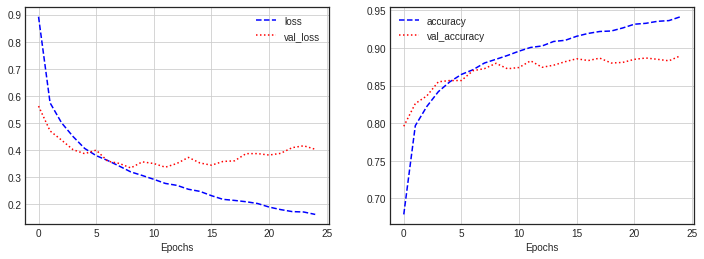

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2 ,1)
plt.plot(hist_2.history['loss'], 'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history['acc'], 'b--', label='accuracy')
plt.plot(hist_2.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

### 모델 재평가

In [ ]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4193 - acc: 0.8817


[0.41931894421577454, 0.8816999793052673]

## 모델 성능 높이기 - 많은 레이어 쌓기

In [ ]:
from tensorflow.keras.layers import BatchNormalization, 

In [ ]:
def build_model3():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(input)
  output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)

  output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
  output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2,2))(output)
  output = Dropout(0.5)(output)

  output = Flatten()(output)
  output = Dense(units=256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=100, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=10, activation='softmax')(output)
  
  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

  return model

model_3 = build_model3()
model_3.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 256)      

## 모델 학습 및 결과 시각화

In [ ]:
hist_3 = model_3.fit(x_train, y_train, epochs=25, validation_split=0.3, batch_size=128)

Epoch 1/25
329/329 [==============================] - 4s 12ms/step - loss: 0.8359 - acc: 0.6965 - val_loss: 0.4364 - val_acc: 0.8387
Epoch 2/25
329/329 [==============================] - 4s 11ms/step - loss: 0.4759 - acc: 0.8315 - val_loss: 0.3455 - val_acc: 0.8742
Epoch 3/25
329/329 [==============================] - 4s 11ms/step - loss: 0.3895 - acc: 0.8622 - val_loss: 0.2867 - val_acc: 0.8973
Epoch 4/25
329/329 [==============================] - 4s 11ms/step - loss: 0.3476 - acc: 0.8807 - val_loss: 0.2737 - val_acc: 0.8999
Epoch 5/25
329/329 [==============================] - 4s 11ms/step - loss: 0.3241 - acc: 0.8858 - val_loss: 0.2608 - val_acc: 0.9069
Epoch 6/25
329/329 [==============================] - 4s 11ms/step - loss: 0.2999 - acc: 0.8948 - val_loss: 0.2464 - val_acc: 0.9117
Epoch 7/25
329/329 [==============================] - 4s 11ms/step - loss: 0.2859 - acc: 0.8988 - val_loss: 0.2495 - val_acc: 0.9102
Epoch 8/25
329/329 [==============================] - 4s 11ms/step - 

- 과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음

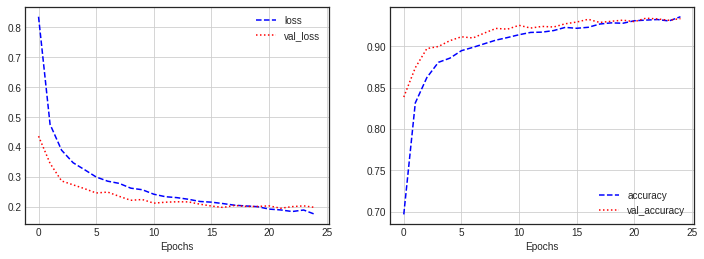

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2 ,1)
plt.plot(hist_3.history['loss'], 'b--', label='loss')
plt.plot(hist_3.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_3.history['acc'], 'b--', label='accuracy')
plt.plot(hist_3.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2158 - acc: 0.9266


[0.21576794981956482, 0.9265999794006348]

## 모델 성능 높이기 - 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range= 0.2,
    shear_range= 0.6,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [ ]:
augment_size = 200

In [ ]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [ ]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1, 28, 28, 1), 
                                 np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

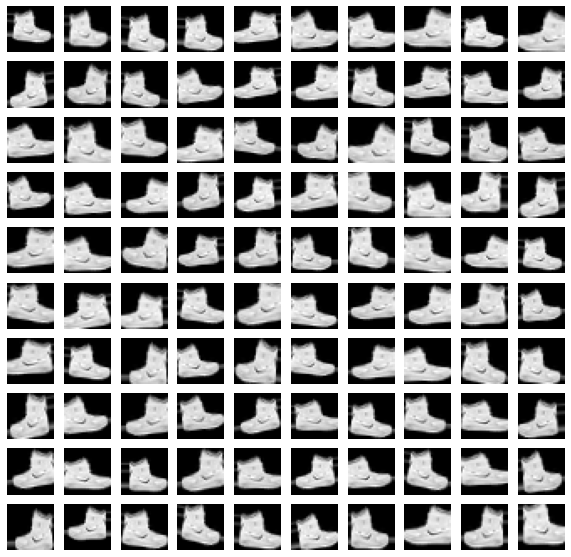

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1, 101):
  plt.subplot(10, 10, i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28,28), cmap='gray')

데이터 추가

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range=15,
    zoom_range= 0.1,
    shear_range= 0.6,
    width_shift_range=0.15,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [ ]:
augment_size=30000

In [ ]:
random_mask = np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [ ]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), 
                                   batch_size=augment_size, shuffle=False).next()[0]
x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_train.shape)

(90000, 28, 28, 1)


In [ ]:
print(y_train.shape)

(90000,)


## 모델 학습 및 결과 시각화

In [ ]:
model_4 = build_model3()
model_4.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 256)      

In [ ]:
hist_4 = model_4.fit(x_train, y_train, epochs=25, validation_split=0.3, batch_size=128)

Epoch 1/25
493/493 [==============================] - 6s 12ms/step - loss: 0.7741 - acc: 0.7186 - val_loss: 0.9438 - val_acc: 0.6386
Epoch 2/25
493/493 [==============================] - 6s 11ms/step - loss: 0.4512 - acc: 0.8416 - val_loss: 0.7683 - val_acc: 0.7158
Epoch 3/25
493/493 [==============================] - 6s 11ms/step - loss: 0.3789 - acc: 0.8677 - val_loss: 0.7133 - val_acc: 0.7369
Epoch 4/25
493/493 [==============================] - 6s 12ms/step - loss: 0.3480 - acc: 0.8792 - val_loss: 0.6189 - val_acc: 0.7809
Epoch 5/25
493/493 [==============================] - 6s 12ms/step - loss: 0.3157 - acc: 0.8901 - val_loss: 0.6070 - val_acc: 0.7761
Epoch 6/25
493/493 [==============================] - 6s 11ms/step - loss: 0.3022 - acc: 0.8937 - val_loss: 0.5726 - val_acc: 0.7876
Epoch 7/25
493/493 [==============================] - 6s 11ms/step - loss: 0.2867 - acc: 0.8990 - val_loss: 0.5568 - val_acc: 0.7935
Epoch 8/25
493/493 [==============================] - 6s 11ms/step - 

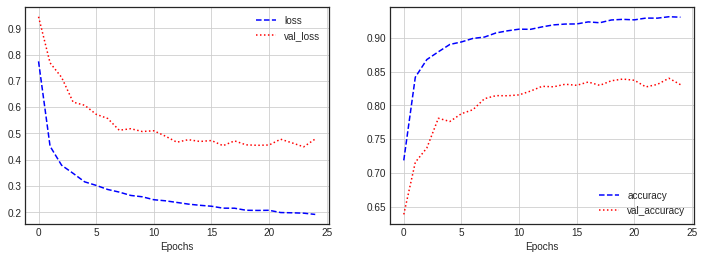

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2 ,1)
plt.plot(hist_4.history['loss'], 'b--', label='loss')
plt.plot(hist_4.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_4.history['acc'], 'b--', label='accuracy')
plt.plot(hist_4.history['val_acc'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

In [ ]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2120 - acc: 0.9266


[0.21199660003185272, 0.9265999794006348]